# PCA Assignment

#### Name: Tanmay Goyal
#### Roll Number: 2020111025

## Q1

In [6]:
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
filePath = "C:/Users/Tanmay/Downloads/wine.xlsx"
df = pd.read_excel(filePath)
columnType = df['Type']
df.drop(['Type'], axis=1, inplace=True)
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df = pd.concat([df, columnType], axis=1)
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


## Q2
### 2.1

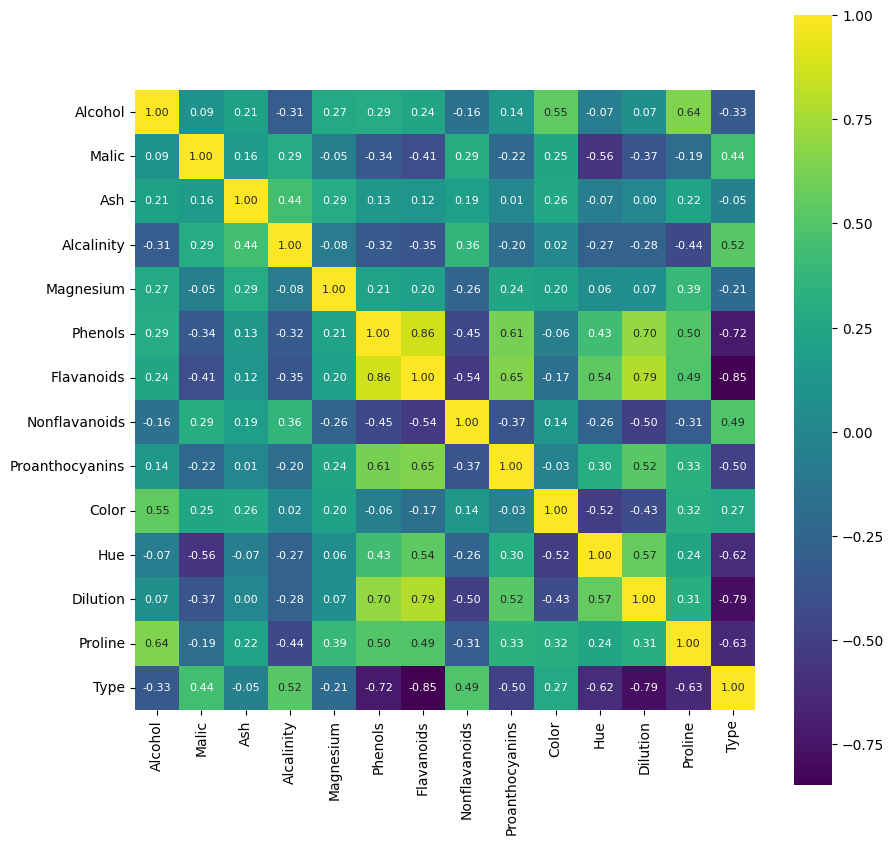

In [8]:

corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='viridis')
plt.show()

- Observations
  - Shades towards yellow indicate postive correlation whereas shades towards green indicate weaker positive correlation. Also, negative correlations are represented more by purple shades. 
  - Most correlation values are around 0.20 to 0.30.  

### 2.2

Number of components to retain based on parallel analysis: 3
Number of components to retain based on 95% variance: 10


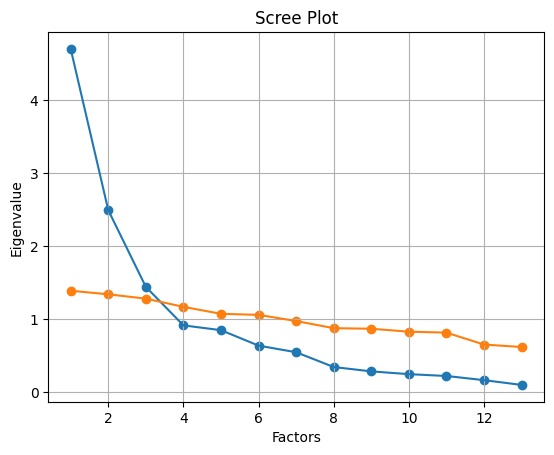

In [14]:
features = df.drop(columns=['Type'])
fa = FactorAnalyzer(rotation=None, method='principal', is_corr_matrix=False)
fa.fit(features)
ev, v = fa.get_eigenvalues()

randomData = np.random.randn(features.shape[0], features.shape[1])
randomAnalysis = FactorAnalyzer(rotation=None, method='principal', is_corr_matrix=False)
randomAnalysis.fit(randomData)
ev_random, v_random = randomAnalysis.get_eigenvalues()

numComponents = sum(ev > ev_random)
print('Number of components to retain based on parallel analysis:', numComponents)

varianceExplained = ev/sum(ev)
cumulativeVarianceExplained = np.cumsum(varianceExplained)
numComponents = sum(cumulativeVarianceExplained <= 0.95) + 1
print('Number of components to retain based on 95% variance:', numComponents)


plt.scatter(range(1, features.shape[1]+1), ev) # Actual Data
plt.plot(range(1, features.shape[1]+1), ev)
plt.scatter(range(1, features.shape[1]+1), ev_random) # Random Data
plt.plot(range(1, features.shape[1]+1), ev_random)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

- Observations
  - **Aggression vs. Conservatism:** Parallel analysis suggests fewer components for retention, as it is typically more conservative. It concentrates on capturing only the crucial elements that make a substantial contribution to the variation in the data.
  - **Dimensionality against Comprehensiveness:** Conversely, by keeping more components, the proportion of variance explained criterion seeks to provide a more thorough depiction of the data. It puts more emphasis on capturing a greater percentage of the volatility in the data, which could lead to a higher-dimensional representation.
  - **Compromise between Interpretability and Complexity:** Complexity and interpretability are traded off when selecting one of these approaches. While a greater number suggested by the variance explained criterion may offer a more comprehensive representation but may be more difficult to read, a smaller number suggested by parallel analysis may result in a simpler model but may sacrifice some information.


### 2.3

In [15]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df.drop('Type', axis=1))
print(f"Proportion of variance explained by the first three principal components: {pca.explained_variance_ratio_}")

Proportion of variance explained by the first three principal components: [0.36198848 0.1920749  0.11123631]


- Observations
  - The dataset might be made simpler while preserving a significant amount of its variability if the first three main components are the only ones kept.
  - The dimensions that these primary components reflect in the data show a high degree of variability, suggesting that they might be associated with major underlying features or patterns.
  - The principal components might match significant chemical traits or qualities, such acidity, alcohol percentage, or flavor profiles, of the wines in the dataset.
  - There is a possibility that the original dataset had a high dimensionality since a significant amount of the variation is captured by the first three main components.

### 2.4

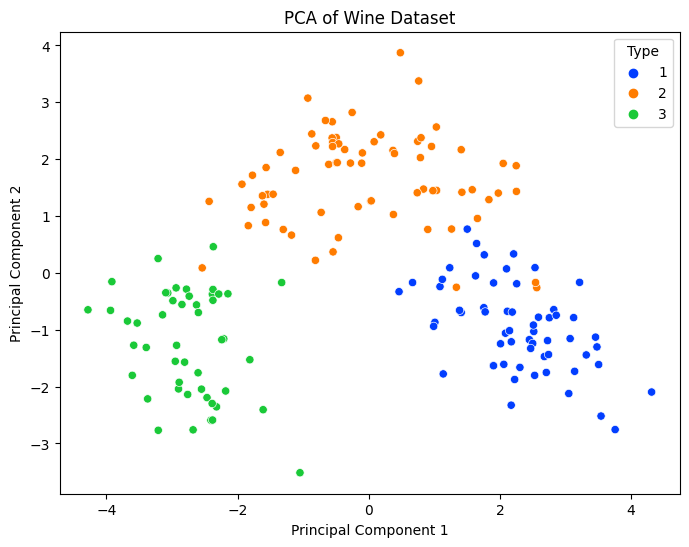

In [18]:
pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

# Merging with the Type column to color-code the wine types
finalDf = pd.concat([pca_df, df[['Type']]], axis = 1)

# Scatter plot
plt.figure(figsize = (8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Type', data=finalDf, palette='bright')
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The link between the first two components and the original variables is displayed in the scatter plot of the first two main components. This can assist in finding trends in the data and spotting anomalies. Also, the first two main components are able to capture the variance in the data that is crucial for differentiating between the classes as the points from various classes form unique clusters. We can also observe that: 
- PC1 can fairly effectively separate all of the classes by itself
- Outliers in the point mixing can be recognized 
- PC2 can effectively distinguish Class 2 from Classes 3 and 1.

## Q3

**Null Hypothesis**: The observed distribution of wine types does not significantly differ from an equal distribution amongst the three types. In other words, it proposes that the observed distribution of wine types matches the expected distribution.

**Alternative Hypothesis**: The observed distribution of wine types significantly differs from an equal distribution amongst the three types. Specifically, it proposes that the observed distribution significantly deviates from an equal distribution among the three types.

In [21]:
import numpy as np
from scipy.stats import chisquare

observed = np.array([59, 71, 48])
expected = np.array([np.sum(observed)/3] * 3)
chiStat, p_val = chisquare(observed, f_exp=expected)

print("Chi-Square Statistic:", chiStat)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Since p-value is less than alpha, we reject the null hypothesis.")
    print("The observed distribution of wine types significantly differs from an equal distribution.")
else:
    print("Since p-value is greater than or equal to alpha, we fail to reject the null hypothesis.")
    print("The observed distribution of wine types does not significantly differ from an equal distribution.")


Chi-Square Statistic: 4.4606741573033695
P-value: 0.10749219070565924
Since p-value is greater than or equal to alpha, we fail to reject the null hypothesis.
The observed distribution of wine types does not significantly differ from an equal distribution.


- Since p-value is greater than or equal to alpha, we fail to reject the null hypothesis. The observed distribution of wine types does not significantly differ from an equal distribution.
- There is insufficient evidence to conclude that the observed distribution significantly deviates from an equal distribution among the wine types. 
- This indicates that the distribution of wine types in the dataset is consistent with an expected distribution where each type of wine is equally represented.

## Q4

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency

alcohol_percentiles = df['Alcohol'].quantile([0, 0.33, 0.66, 1])
alcohol_categories = pd.cut(df['Alcohol'], bins=alcohol_percentiles, labels=['Low', 'Medium', 'High'])
df[['Alcohol', 'Alcohol Category']].head()

NameError: name 'df' is not defined

In [32]:
contingency_table = pd.crosstab(df['Type'], alcohol_categories)
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Alcohol  Low  Medium  High
Type                      
1          0      16    43
2         52      15     3
3          6      27    15


**Null Hypothesis (H0)**: There is no association between 'Type' and 'Alcohol Category' (they are independent)

**Alternative Hypothesis (H1)**: There is an association between 'Type' and 'Alcohol Category' (they are not independent)

In [33]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_val)

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("\nSince p-value is less than alpha, we reject the null hypothesis.")
    print("There is an association between wine type and alcohol category.")
else:
    print("\nSince p-value is greater than or equal to alpha, we fail to reject the null hypothesis.")
    print("There is no association between wine type and alcohol category.")



Chi-Square Statistic: 117.48001847290641
Degrees of Freedom: 4
P-value: 1.844180421486225e-24

Since p-value is less than alpha, we reject the null hypothesis.
There is an association between wine type and alcohol category.


- There is sufficient evidence to reject the null hypothesis.
- The large chi-square statistic (~117) suggests a significant difference between the observed and expected frequencies, further supporting the rejection of the null hypothesis.
- With a very low p-value, we can confidently conclude that there is a significant association between the type of wine and the alcohol category.